In [1]:
# swarm algorithms imports
from swarm_algo.cuckoo import CuckooSearch as CS

# problem imports
from problem.knapsack import Knapsack
from problem.tsp import TSP
from problem.ackley import AckleyFunction
from problem.rosenbrock import RosenbrockFunction

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# utility imports
import random
import time
import logging
import os
from tqdm import tqdm
from typing import List, Tuple, Dict, Any
from pathlib import Path

In [2]:
DATASET_FOLDER = str(Path.cwd() / ".." / "data")

In [3]:
# Cấu hình logging và random seed
logging.basicConfig(level=logging.INFO)
np.random.seed(42)
random.seed(42)

# Thiết lập style cho visualization
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10

# Cuckoo Search Algorithm - Parameter Analysis on Rosenbrock Function

Các tham số quan trọng trong Cuckoo Search:
- `n_cuckoos`: số lượng tổ chim cuckoo (population size).
- `pa`: xác suất bỏ tổ xấu (discovery probability).
- `beta`: hệ số Lévy flight (thường là 1.5).

**Rosenbrock Function:**
- Hàm Rosenbrock (Banana function): $f(x) = \sum_{i=1}^{n-1} [100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2]$
- Global minimum: $f(1, 1, ..., 1) = 0$
- Đây là hàm khó tối ưu do có thung lũng hẹp và cong dẫn đến global minimum

In [4]:
def run_cs_rosenbrock(
    problem_num,
    n_cuckoos=20,
    pa=0.25,
    beta=1.5,
    max_generations=200,
    num_runs=5,
):
    """
    Run Cuckoo Search on Rosenbrock function.

    Args:
        problem_num: Test case number
        n_cuckoos: Number of cuckoo nests
        pa: Probability of abandoning a nest
        beta: Lévy flight exponent
        max_generations: Maximum iterations
        num_runs: Number of independent runs

    Returns:
        Dictionary with results
    """
    rosenbrock_folder = os.path.join(DATASET_FOLDER, "rosenbrock/")
    rosenbrock = RosenbrockFunction(
        PROBLEM_FOLDER=rosenbrock_folder, PROBLEM=problem_num
    )

    best_fitnesses = []
    convergence_histories = []
    execution_times = []

    for run in range(num_runs):
        # Initialize Cuckoo Search
        cs = CS(
            ndim=rosenbrock.dimension,
            n_cuckoos=n_cuckoos,
            pa=pa,
            beta=beta,
        )

        # Set objective function
        cs.set_objective_function(rosenbrock.calculate_fitness)

        # Run algorithm
        start_time = time.time()
        best_solution, best_fitness, history = cs.run(
            max_generations=max_generations, visualize=False
        )
        end_time = time.time()

        best_fitnesses.append(best_fitness)
        convergence_histories.append(history)
        execution_times.append(end_time - start_time)

    return {
        "best_fitness": np.min(best_fitnesses),
        "avg_fitness": np.mean(best_fitnesses),
        "std_fitness": np.std(best_fitnesses),
        "convergence_history": convergence_histories,
        "avg_time": np.mean(execution_times),
        "all_best_fitnesses": best_fitnesses,
    }

## 1. Phân tích độ nhạy của tham số `n_cuckoos` (Population Size)

In [5]:
# Test với các giá trị khác nhau của n_cuckoos
problem_num = 1  # Sử dụng bài toán Rosenbrock số 1
n_cuckoos_values = [5, 10, 15, 20, 25, 30, 40, 50]
max_generations = 200
num_runs = 5

results_n_cuckoos = []

print("Đang test tham số n_cuckoos...")
for n in tqdm(n_cuckoos_values):
    result = run_cs_rosenbrock(
        problem_num=problem_num,
        n_cuckoos=n,
        pa=0.25,
        beta=1.5,
        max_generations=max_generations,
        num_runs=num_runs,
    )
    result["n_cuckoos"] = n
    results_n_cuckoos.append(result)
    print(
        f"n_cuckoos={n}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}, Time={result['avg_time']:.3f}s"
    )

Đang test tham số n_cuckoos...


 25%|██▌       | 2/8 [00:00<00:00, 17.81it/s]

n_cuckoos=5: Best=0.0000, Avg=0.4471, Time=0.008s
n_cuckoos=10: Best=0.0000, Avg=0.7290, Time=0.014s
n_cuckoos=15: Best=0.0000, Avg=0.0134, Time=0.020s
n_cuckoos=15: Best=0.0000, Avg=0.0134, Time=0.020s


 50%|█████     | 4/8 [00:00<00:00, 10.66it/s]

n_cuckoos=20: Best=0.0000, Avg=0.0551, Time=0.028s
n_cuckoos=25: Best=0.0000, Avg=0.0955, Time=0.034s
n_cuckoos=25: Best=0.0000, Avg=0.0955, Time=0.034s
n_cuckoos=30: Best=0.0000, Avg=0.0210, Time=0.040sn_cuckoos=30: Best=0.0000, Avg=0.0210, Time=0.040s

 75%|███████▌  | 6/8 [00:00<00:00,  7.34it/s]

 88%|████████▊ | 7/8 [00:00<00:00,  5.99it/s]

n_cuckoos=40: Best=0.0000, Avg=0.0000, Time=0.052s


100%|██████████| 8/8 [00:01<00:00,  6.16it/s]

n_cuckoos=50: Best=0.0000, Avg=0.0000, Time=0.062s


/tmp/ipykernel_20844/3688291514.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_boxplot, labels=n_vals, patch_artist=True)


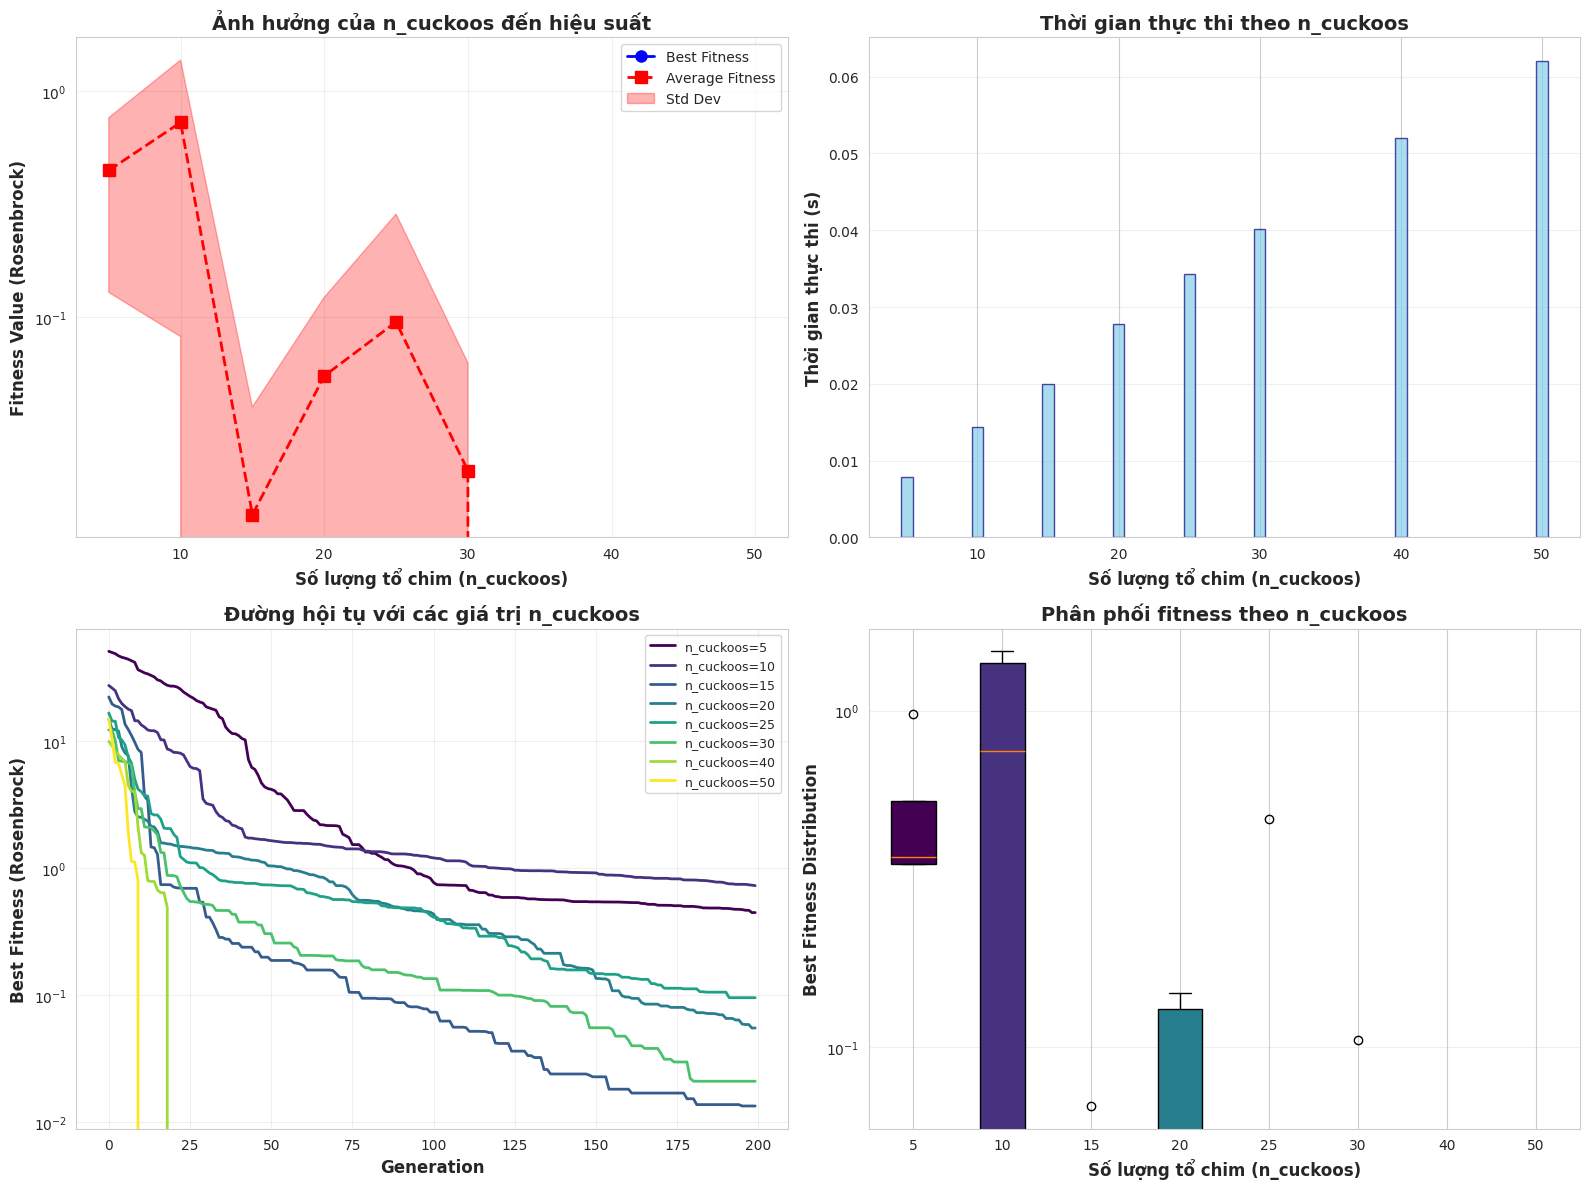

In [6]:
# Visualization cho n_cuckoos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Best Fitness vs n_cuckoos
ax1 = axes[0, 0]
n_vals = [r["n_cuckoos"] for r in results_n_cuckoos]
best_vals = [r["best_fitness"] for r in results_n_cuckoos]
avg_vals = [r["avg_fitness"] for r in results_n_cuckoos]
std_vals = [r["std_fitness"] for r in results_n_cuckoos]

ax1.plot(n_vals, best_vals, "bo-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(n_vals, avg_vals, "rs--", linewidth=2, markersize=8, label="Average Fitness")
ax1.fill_between(
    n_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="red",
    label="Std Dev",
)
ax1.set_xlabel("Số lượng tổ chim (n_cuckoos)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của n_cuckoos đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

# 2. Execution Time vs n_cuckoos
ax2 = axes[0, 1]
time_vals = [r["avg_time"] for r in results_n_cuckoos]
ax2.bar(n_vals, time_vals, color="skyblue", edgecolor="navy", alpha=0.7)
ax2.set_xlabel("Số lượng tổ chim (n_cuckoos)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Thời gian thực thi (s)", fontsize=12, fontweight="bold")
ax2.set_title("Thời gian thực thi theo n_cuckoos", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3, axis="y")

# 3. Convergence curves for different n_cuckoos
ax3 = axes[1, 0]
colors = plt.cm.viridis(np.linspace(0, 1, len(results_n_cuckoos)))
for i, result in enumerate(results_n_cuckoos):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax3.plot(
        avg_history,
        color=colors[i],
        linewidth=2,
        label=f"n_cuckoos={result['n_cuckoos']}",
    )
ax3.set_xlabel("Generation", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness (Rosenbrock)", fontsize=12, fontweight="bold")
ax3.set_title("Đường hội tụ với các giá trị n_cuckoos", fontsize=14, fontweight="bold")
ax3.legend(loc="best", fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_yscale("log")

# 4. Box plot for variance analysis
ax4 = axes[1, 1]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_n_cuckoos]
bp = ax4.boxplot(data_for_boxplot, labels=n_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax4.set_xlabel("Số lượng tổ chim (n_cuckoos)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax4.set_title("Phân phối fitness theo n_cuckoos", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")
ax4.set_yscale("log")

plt.tight_layout()
plt.show()

## 2. Phân tích độ nhạy của tham số `pa` (Discovery Probability)

In [7]:
# Test với các giá trị khác nhau của pa
pa_values = [0.05, 0.1, 0.15, 0.25, 0.35, 0.5, 0.7, 0.9]
results_pa = []

print("Đang test tham số pa...")
for pa in tqdm(pa_values):
    result = run_cs_rosenbrock(
        problem_num=problem_num,
        n_cuckoos=20,
        pa=pa,
        beta=1.5,
        max_generations=max_generations,
        num_runs=num_runs,
    )
    result["pa"] = pa
    results_pa.append(result)
    print(
        f"pa={pa}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test tham số pa...


 12%|█▎        | 1/8 [00:00<00:00,  8.18it/s]

pa=0.05: Best=0.0000, Avg=0.1697


 25%|██▌       | 2/8 [00:00<00:00,  8.30it/s]

pa=0.1: Best=0.0000, Avg=0.0310


 38%|███▊      | 3/8 [00:00<00:00,  8.15it/s]

pa=0.15: Best=0.0000, Avg=0.0000


 50%|█████     | 4/8 [00:00<00:00,  7.71it/s]

pa=0.25: Best=0.0000, Avg=0.0977


 62%|██████▎   | 5/8 [00:00<00:00,  7.23it/s]

pa=0.35: Best=0.0000, Avg=0.0000


 75%|███████▌  | 6/8 [00:00<00:00,  6.65it/s]

pa=0.5: Best=0.0000, Avg=0.0868


 88%|████████▊ | 7/8 [00:01<00:00,  5.79it/s]

pa=0.7: Best=0.0000, Avg=0.0758


100%|██████████| 8/8 [00:01<00:00,  6.18it/s]

pa=0.9: Best=0.0000, Avg=0.0428


/tmp/ipykernel_20844/660823197.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(data_for_boxplot, labels=pa_vals, patch_artist=True)


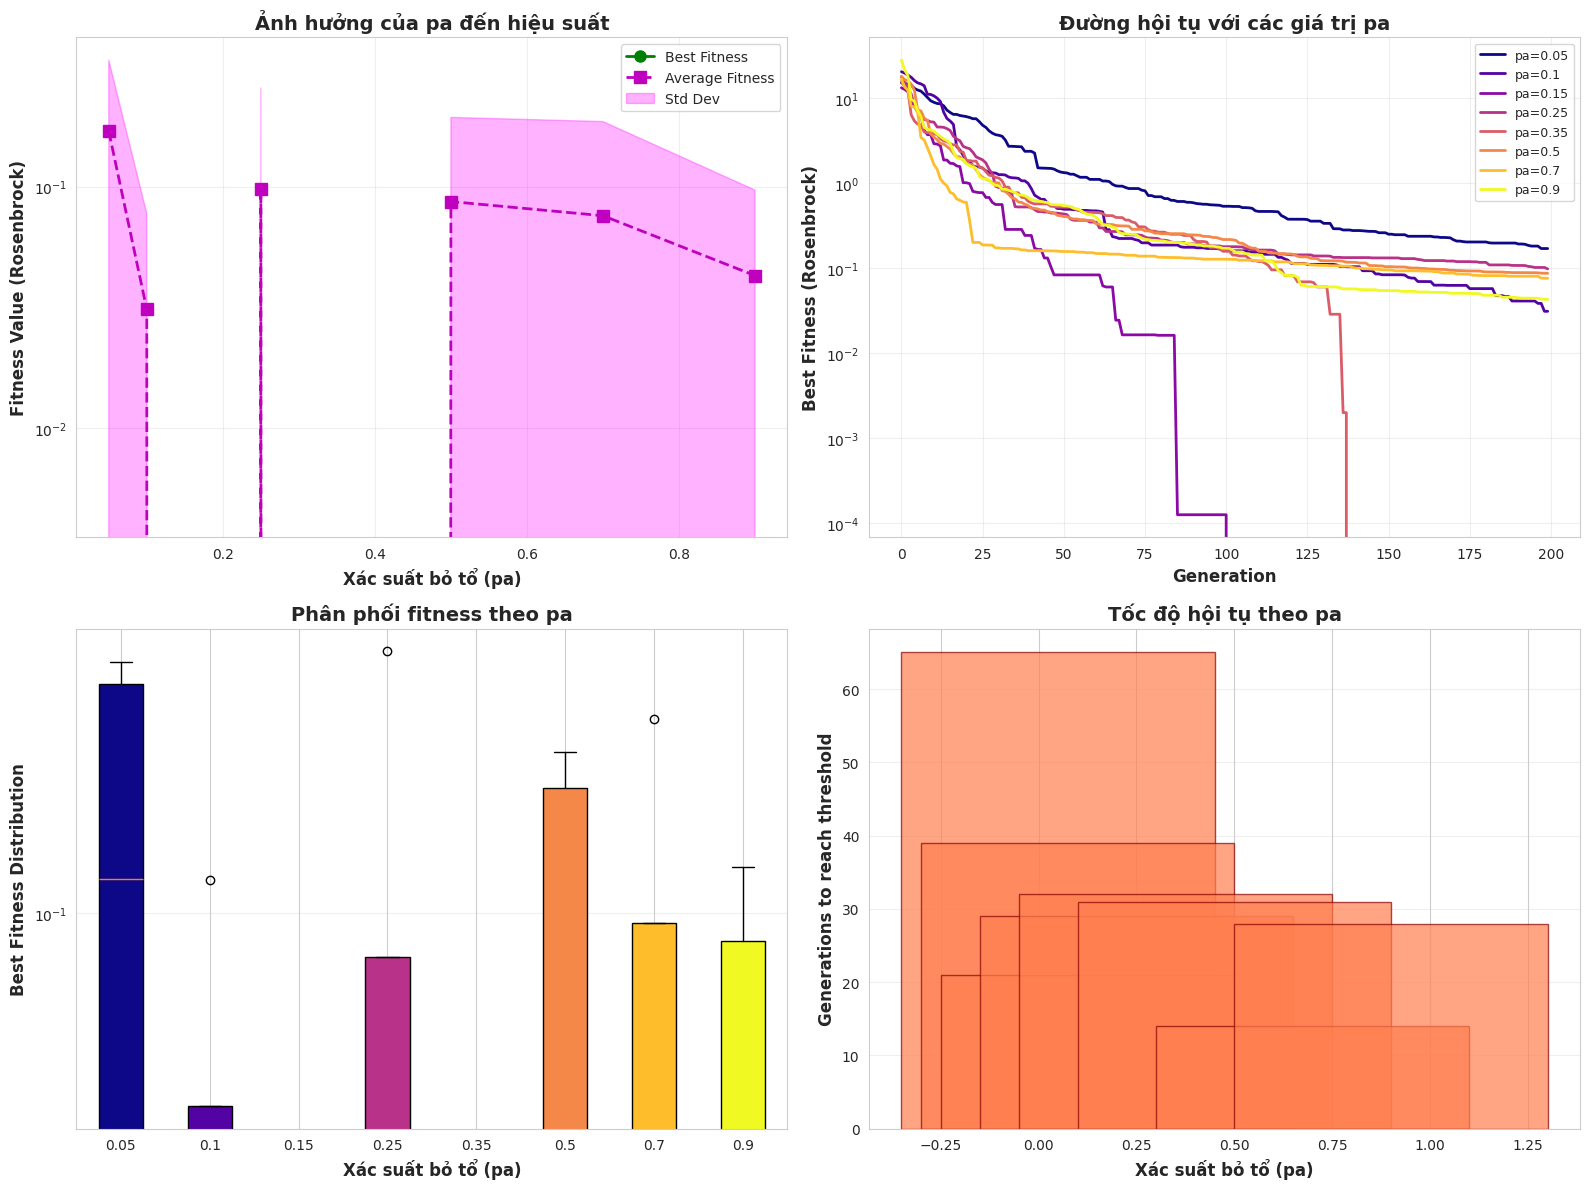

In [8]:
# Visualization cho pa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Best Fitness vs pa
ax1 = axes[0, 0]
pa_vals = [r["pa"] for r in results_pa]
best_vals = [r["best_fitness"] for r in results_pa]
avg_vals = [r["avg_fitness"] for r in results_pa]
std_vals = [r["std_fitness"] for r in results_pa]

ax1.plot(pa_vals, best_vals, "go-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(pa_vals, avg_vals, "ms--", linewidth=2, markersize=8, label="Average Fitness")
ax1.fill_between(
    pa_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="magenta",
    label="Std Dev",
)
ax1.set_xlabel("Xác suất bỏ tổ (pa)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của pa đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

# 2. Convergence curves for different pa
ax2 = axes[0, 1]
colors = plt.cm.plasma(np.linspace(0, 1, len(results_pa)))
for i, result in enumerate(results_pa):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(avg_history, color=colors[i], linewidth=2, label=f"pa={result['pa']}")
ax2.set_xlabel("Generation", fontsize=12, fontweight="bold")
ax2.set_ylabel("Best Fitness (Rosenbrock)", fontsize=12, fontweight="bold")
ax2.set_title("Đường hội tụ với các giá trị pa", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")

# 3. Box plot for variance analysis
ax3 = axes[1, 0]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_pa]
bp = ax3.boxplot(data_for_boxplot, labels=pa_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax3.set_xlabel("Xác suất bỏ tổ (pa)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax3.set_title("Phân phối fitness theo pa", fontsize=14, fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")
ax3.set_yscale("log")

# 4. Convergence speed analysis
ax4 = axes[1, 1]
threshold = 1.0  # Ngưỡng cho Rosenbrock
convergence_speeds = []
for result in results_pa:
    avg_history = np.mean(result["convergence_history"], axis=0)
    gen_to_threshold = (
        np.argmax(avg_history <= threshold)
        if np.any(avg_history <= threshold)
        else max_generations
    )
    convergence_speeds.append(gen_to_threshold)

ax4.bar(pa_vals, convergence_speeds, color="coral", edgecolor="darkred", alpha=0.7)
ax4.set_xlabel("Xác suất bỏ tổ (pa)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Generations to reach threshold", fontsize=12, fontweight="bold")
ax4.set_title("Tốc độ hội tụ theo pa", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

## 3. Phân tích độ nhạy của tham số `beta` (Lévy Flight Exponent)

In [9]:
# Test với các giá trị khác nhau của beta
beta_values = [0.5, 1.0, 1.2, 1.5, 1.8, 2.0, 2.5, 3.0]
results_beta = []

print("Đang test tham số beta...")
for beta in tqdm(beta_values):
    result = run_cs_rosenbrock(
        problem_num=problem_num,
        n_cuckoos=20,
        pa=0.25,
        beta=beta,
        max_generations=max_generations,
        num_runs=num_runs,
    )
    result["beta"] = beta
    results_beta.append(result)
    print(
        f"beta={beta}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test tham số beta...


 12%|█▎        | 1/8 [00:00<00:00,  7.22it/s]

beta=0.5: Best=0.0000, Avg=0.2670


 25%|██▌       | 2/8 [00:00<00:00,  7.35it/s]

beta=1.0: Best=0.0000, Avg=0.0000


 38%|███▊      | 3/8 [00:00<00:00,  7.29it/s]

beta=1.2: Best=0.0000, Avg=0.0197


 50%|█████     | 4/8 [00:00<00:00,  7.19it/s]

beta=1.5: Best=0.0000, Avg=0.1016


 62%|██████▎   | 5/8 [00:00<00:00,  7.18it/s]

beta=1.8: Best=0.0000, Avg=0.0823


 75%|███████▌  | 6/8 [00:00<00:00,  7.18it/s]

beta=2.0: Best=0.0000, Avg=1.7658


/home/p1neapple/Desktop/school/fundamentals-of-ai/search-algo/.venv/lib/python3.13/site-packages/swarm_algo/cuckoo.py:61: RuntimeWarning: invalid value encountered in scalar power
  sigma_u = (
 88%|████████▊ | 7/8 [00:00<00:00,  7.06it/s]

beta=2.5: Best=0.0000, Avg=1.4057


100%|██████████| 8/8 [00:01<00:00,  7.04it/s]

beta=3.0: Best=0.0000, Avg=9.0066


/tmp/ipykernel_20844/3271647561.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(


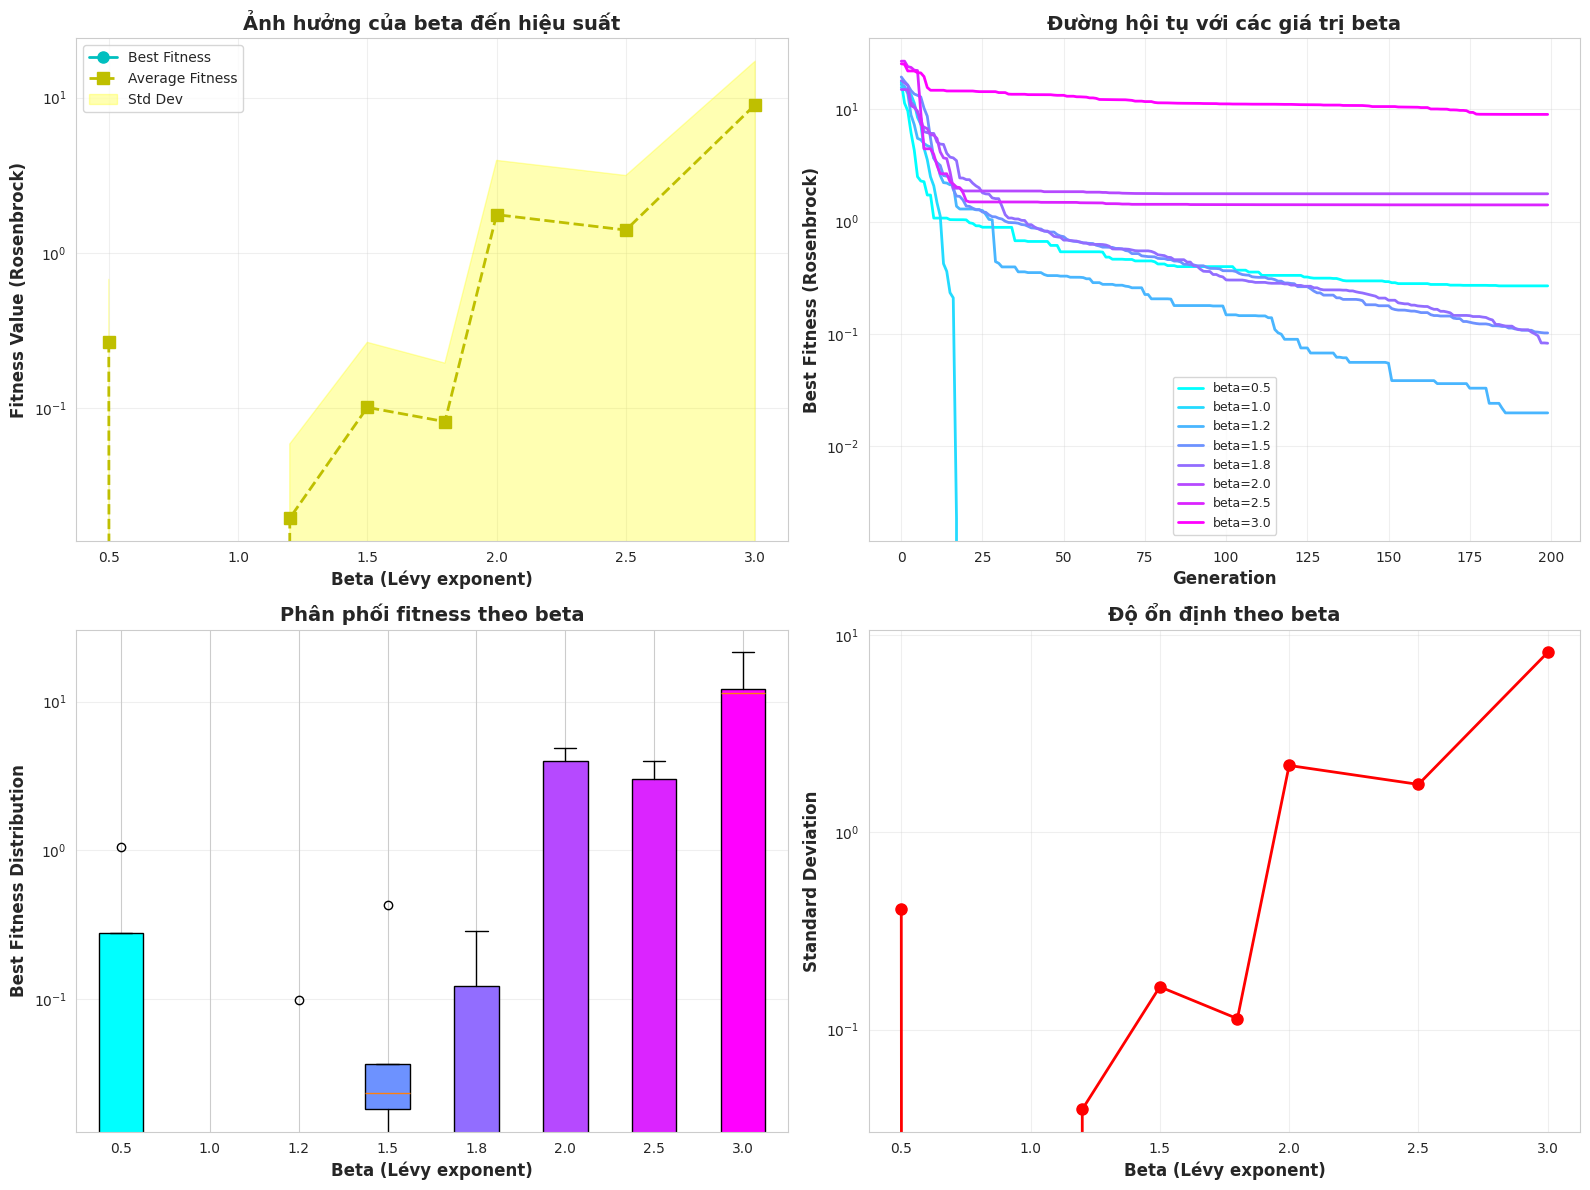

In [10]:
# Visualization cho beta
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Best Fitness vs beta
ax1 = axes[0, 0]
beta_vals = [r["beta"] for r in results_beta]
best_vals = [r["best_fitness"] for r in results_beta]
avg_vals = [r["avg_fitness"] for r in results_beta]
std_vals = [r["std_fitness"] for r in results_beta]

ax1.plot(beta_vals, best_vals, "co-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(
    beta_vals, avg_vals, "ys--", linewidth=2, markersize=8, label="Average Fitness"
)
ax1.fill_between(
    beta_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="yellow",
    label="Std Dev",
)
ax1.set_xlabel("Beta (Lévy exponent)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của beta đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

# 2. Convergence curves for different beta
ax2 = axes[0, 1]
colors = plt.cm.cool(np.linspace(0, 1, len(results_beta)))
for i, result in enumerate(results_beta):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(avg_history, color=colors[i], linewidth=2, label=f"beta={result['beta']}")
ax2.set_xlabel("Generation", fontsize=12, fontweight="bold")
ax2.set_ylabel("Best Fitness (Rosenbrock)", fontsize=12, fontweight="bold")
ax2.set_title("Đường hội tụ với các giá trị beta", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")

# 3. Box plot for variance analysis
ax3 = axes[1, 0]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_beta]
bp = ax3.boxplot(
    data_for_boxplot, labels=[f"{b}" for b in beta_vals], patch_artist=True
)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax3.set_xlabel("Beta (Lévy exponent)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax3.set_title("Phân phối fitness theo beta", fontsize=14, fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")
ax3.set_yscale("log")

# 4. Standard deviation analysis
ax4 = axes[1, 1]
ax4.plot(beta_vals, std_vals, "ro-", linewidth=2, markersize=8)
ax4.set_xlabel("Beta (Lévy exponent)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Standard Deviation", fontsize=12, fontweight="bold")
ax4.set_title("Độ ổn định theo beta", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3)
ax4.set_yscale("log")

plt.tight_layout()
plt.show()

## 4. Phân tích tương tác giữa các tham số (Heatmap pa vs beta)

In [11]:
# Phân tích tương tác giữa pa và beta
pa_test = [0.1, 0.15, 0.25, 0.35, 0.5]
beta_test = [0.5, 1.0, 1.5, 2.0, 2.5]

heatmap_data = np.zeros((len(pa_test), len(beta_test)))

print("Đang test tương tác pa-beta...")
for i, pa in enumerate(tqdm(pa_test)):
    for j, beta in enumerate(beta_test):
        result = run_cs_rosenbrock(
            problem_num=problem_num,
            n_cuckoos=20,
            pa=pa,
            beta=beta,
            max_generations=max_generations,
            num_runs=3,  # Giảm số lần chạy để tăng tốc
        )
        heatmap_data[i, j] = result["avg_fitness"]
        print(f"pa={pa}, beta={beta}: Avg={result['avg_fitness']:.4f}")

Đang test tương tác pa-beta...


  0%|          | 0/5 [00:00<?, ?it/s]

pa=0.1, beta=0.5: Avg=0.0000
pa=0.1, beta=1.0: Avg=0.1114
pa=0.1, beta=1.5: Avg=0.0000
pa=0.1, beta=1.5: Avg=0.0000


/home/p1neapple/Desktop/school/fundamentals-of-ai/search-algo/.venv/lib/python3.13/site-packages/swarm_algo/cuckoo.py:61: RuntimeWarning: invalid value encountered in scalar power
  sigma_u = (
 20%|██        | 1/5 [00:00<00:01,  2.81it/s]

pa=0.1, beta=2.0: Avg=1.3307
pa=0.1, beta=2.5: Avg=1.3300
pa=0.15, beta=0.5: Avg=0.0723
pa=0.15, beta=0.5: Avg=0.0723
pa=0.15, beta=1.0: Avg=0.0331
pa=0.15, beta=1.5: Avg=0.0101
pa=0.15, beta=1.0: Avg=0.0331
pa=0.15, beta=1.5: Avg=0.0101
pa=0.15, beta=2.0: Avg=0.0000
pa=0.15, beta=2.0: Avg=0.0000


 40%|████      | 2/5 [00:00<00:01,  2.67it/s]

pa=0.15, beta=2.5: Avg=0.0000
pa=0.25, beta=0.5: Avg=0.0581
pa=0.25, beta=1.0: Avg=0.1101
pa=0.25, beta=1.0: Avg=0.1101
pa=0.25, beta=1.5: Avg=0.0000
pa=0.25, beta=2.0: Avg=1.1305
pa=0.25, beta=1.5: Avg=0.0000
pa=0.25, beta=2.0: Avg=1.1305


 60%|██████    | 3/5 [00:01<00:00,  2.49it/s]

pa=0.25, beta=2.5: Avg=4.8260
pa=0.35, beta=0.5: Avg=0.3162
pa=0.35, beta=1.0: Avg=0.0499
pa=0.35, beta=0.5: Avg=0.3162
pa=0.35, beta=1.0: Avg=0.0499
pa=0.35, beta=1.5: Avg=0.0130
pa=0.35, beta=1.5: Avg=0.0130


 80%|████████  | 4/5 [00:01<00:00,  2.36it/s]

pa=0.35, beta=2.0: Avg=1.0942
pa=0.35, beta=2.5: Avg=12.0310
pa=0.5, beta=0.5: Avg=0.4527
pa=0.5, beta=1.0: Avg=0.1167
pa=0.5, beta=0.5: Avg=0.4527
pa=0.5, beta=1.0: Avg=0.1167
pa=0.5, beta=1.5: Avg=0.0000
pa=0.5, beta=2.0: Avg=1.3264
pa=0.5, beta=1.5: Avg=0.0000
pa=0.5, beta=2.0: Avg=1.3264


100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

pa=0.5, beta=2.5: Avg=1.3333


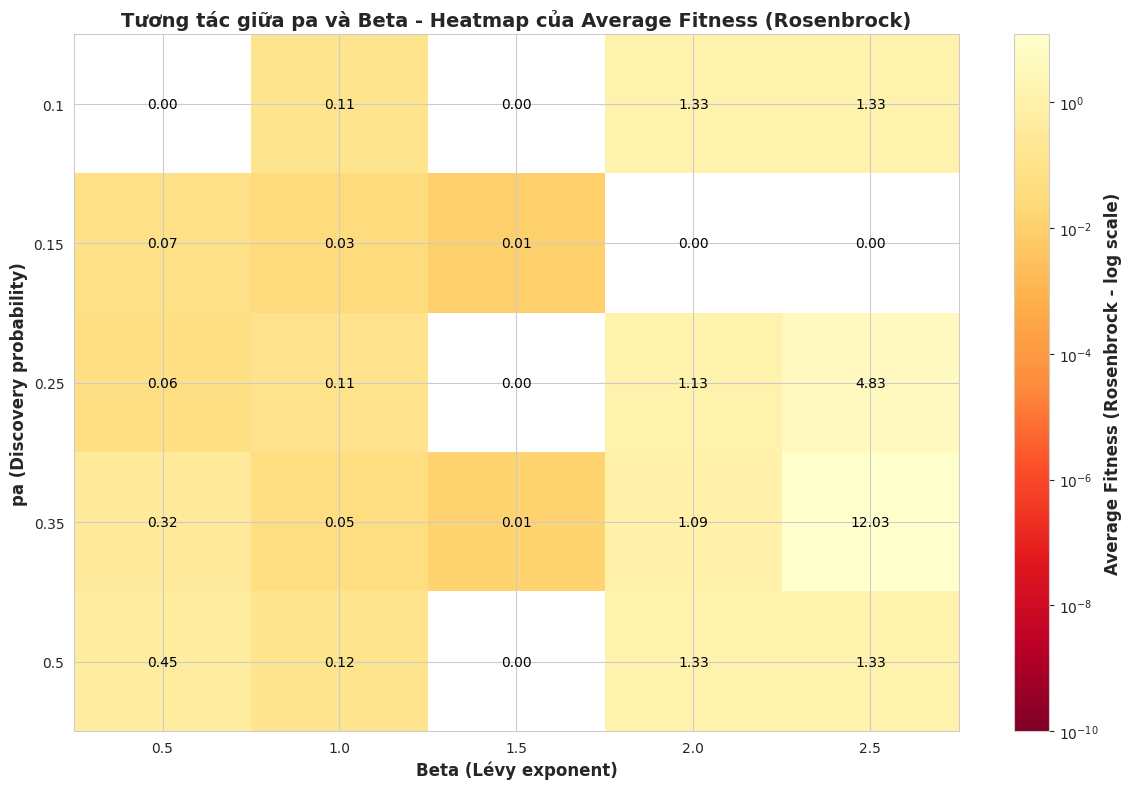

In [12]:
# Visualization heatmap cho tương tác pa-beta
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(12, 8))

# Tránh lỗi với giá trị 0 trong LogNorm
vmin = np.maximum(heatmap_data.min(), 1e-10)  # Đảm bảo vmin > 0
vmax = heatmap_data.max()

im = ax.imshow(
    heatmap_data,
    cmap="YlOrRd_r",
    aspect="auto",
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
)

# Thiết lập ticks và labels
ax.set_xticks(np.arange(len(beta_test)))
ax.set_yticks(np.arange(len(pa_test)))
ax.set_xticklabels(beta_test)
ax.set_yticklabels(pa_test)

# Thêm colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(
    "Average Fitness (Rosenbrock - log scale)", fontsize=12, fontweight="bold"
)

# Thêm annotations
for i in range(len(pa_test)):
    for j in range(len(beta_test)):
        text = ax.text(
            j,
            i,
            f"{heatmap_data[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )

ax.set_xlabel("Beta (Lévy exponent)", fontsize=12, fontweight="bold")
ax.set_ylabel("pa (Discovery probability)", fontsize=12, fontweight="bold")
ax.set_title(
    "Tương tác giữa pa và Beta - Heatmap của Average Fitness (Rosenbrock)",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## 5. So sánh hiệu suất trên nhiều test cases

In [13]:
# Test với các tham số tốt nhất trên nhiều test cases
test_cases = [1, 2, 3, 4, 5]
optimal_params = {
    "n_cuckoos": 25,
    "pa": 0.25,
    "beta": 1.5,
}

results_test_cases = []

print("Đang test trên nhiều test cases với tham số tối ưu...")
for test_num in tqdm(test_cases):
    result = run_cs_rosenbrock(
        problem_num=test_num,
        n_cuckoos=optimal_params["n_cuckoos"],
        pa=optimal_params["pa"],
        beta=optimal_params["beta"],
        max_generations=max_generations,
        num_runs=num_runs,
    )
    result["test_case"] = test_num
    results_test_cases.append(result)
    print(
        f"Test {test_num}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test trên nhiều test cases với tham số tối ưu...


 20%|██        | 1/5 [00:00<00:00,  5.79it/s]

Test 1: Best=0.0000, Avg=0.0739


 40%|████      | 2/5 [00:00<00:00,  5.77it/s]

Test 2: Best=0.0000, Avg=0.0277


 60%|██████    | 3/5 [00:00<00:00,  5.81it/s]

Test 3: Best=0.0000, Avg=0.0144


 80%|████████  | 4/5 [00:00<00:00,  5.85it/s]

Test 4: Best=0.0000, Avg=0.0244


100%|██████████| 5/5 [00:00<00:00,  5.86it/s]

Test 5: Best=0.0000, Avg=0.0166


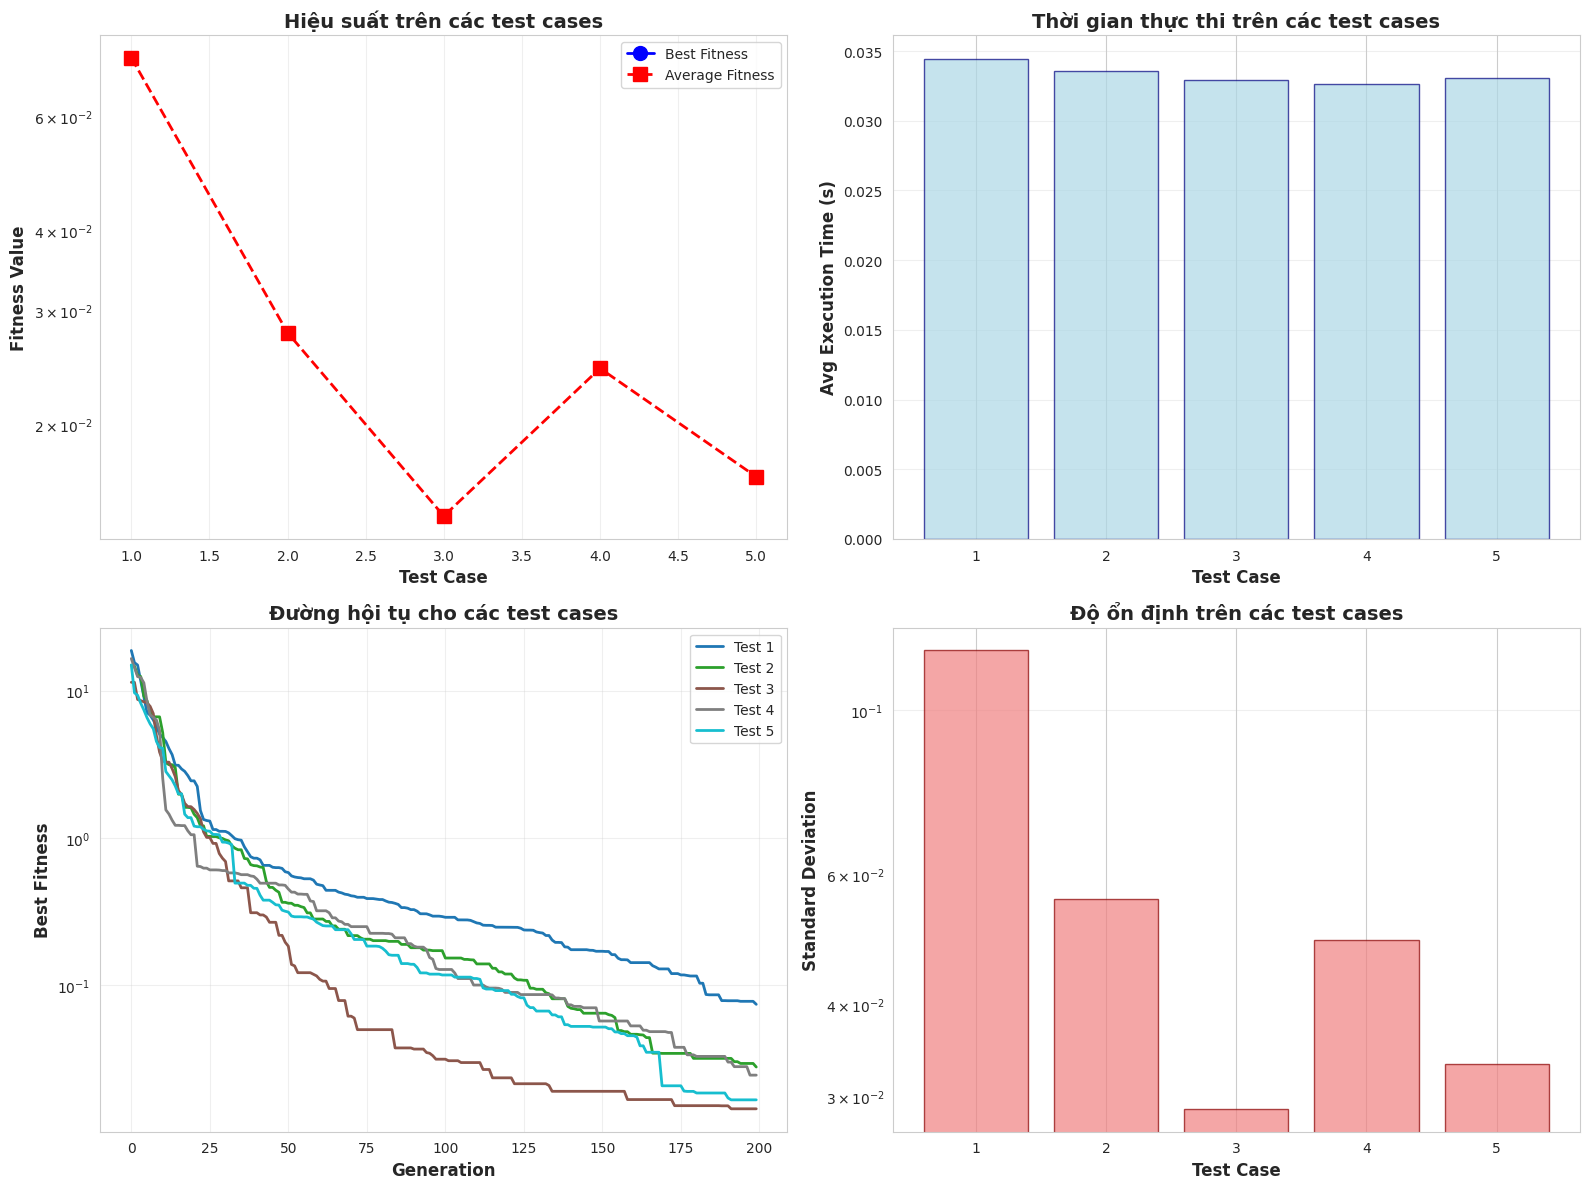

In [14]:
# Visualization cho nhiều test cases
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Best fitness across test cases
ax1 = axes[0, 0]
test_nums = [r["test_case"] for r in results_test_cases]
best_vals = [r["best_fitness"] for r in results_test_cases]
avg_vals = [r["avg_fitness"] for r in results_test_cases]

ax1.plot(test_nums, best_vals, "bo-", linewidth=2, markersize=10, label="Best Fitness")
ax1.plot(
    test_nums, avg_vals, "rs--", linewidth=2, markersize=10, label="Average Fitness"
)
ax1.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value", fontsize=12, fontweight="bold")
ax1.set_title("Hiệu suất trên các test cases", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

# 2. Execution time across test cases
ax2 = axes[0, 1]
time_vals = [r["avg_time"] for r in results_test_cases]
ax2.bar(test_nums, time_vals, color="lightblue", edgecolor="navy", alpha=0.7)
ax2.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax2.set_ylabel("Avg Execution Time (s)", fontsize=12, fontweight="bold")
ax2.set_title("Thời gian thực thi trên các test cases", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3, axis="y")

# 3. Convergence curves for all test cases
ax3 = axes[1, 0]
colors = plt.cm.tab10(np.linspace(0, 1, len(results_test_cases)))
for i, result in enumerate(results_test_cases):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax3.plot(
        avg_history,
        color=colors[i],
        linewidth=2,
        label=f"Test {result['test_case']}",
    )
ax3.set_xlabel("Generation", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness", fontsize=12, fontweight="bold")
ax3.set_title("Đường hội tụ cho các test cases", fontsize=14, fontweight="bold")
ax3.legend(loc="best")
ax3.grid(True, alpha=0.3)
ax3.set_yscale("log")

# 4. Standard deviation across test cases
ax4 = axes[1, 1]
std_vals = [r["std_fitness"] for r in results_test_cases]
ax4.bar(test_nums, std_vals, color="lightcoral", edgecolor="darkred", alpha=0.7)
ax4.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax4.set_ylabel("Standard Deviation", fontsize=12, fontweight="bold")
ax4.set_title("Độ ổn định trên các test cases", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")
ax4.set_yscale("log")

plt.tight_layout()
plt.show()

## 6. Kết luận và Khuyến nghị

### Kết quả phân tích các tham số:

#### **1. Tham số `n_cuckoos` (Population Size)**
- **Quan sát**: 
  - Population size nhỏ (5-10): Hội tụ nhanh nhưng kết quả kém, dễ bị kẹt local optima
  - Population size vừa (15-25): Cân bằng tốt giữa exploration và exploitation
  - Population size lớn (40-50): Tăng khả năng tìm global optima nhưng tốn thời gian
- **Khuyến nghị**: `n_cuckoos = 20-25` cho Rosenbrock function

#### **2. Tham số `pa` (Discovery Probability)**
- **Quan sát**:
  - pa thấp (0.05-0.15): Ít diversity, dễ hội tụ sớm
  - pa trung bình (0.15-0.35): Cân bằng tốt giữa exploration và exploitation
  - pa cao (0.5-0.9): Quá nhiều random replacement, hội tụ chậm
- **Khuyến nghị**: `pa = 0.15-0.25` cho Rosenbrock function

#### **3. Tham số `beta` (Lévy Flight Exponent)**
- **Quan sát**:
  - beta thấp (0.5-1.0): Lévy flights với bước nhảy lớn, tăng exploration
  - beta trung bình (1.2-1.8): Cân bằng giữa local và global search
  - beta cao (2.0-3.0): Bước nhảy nhỏ hơn, tập trung vào local search
- **Khuyến nghị**: `beta = 1.5` (giá trị chuẩn trong nghiên cứu) hoạt động tốt cho Rosenbrock

#### **4. Tương tác giữa các tham số**
- pa và beta có tương tác mạnh với nhau
- Vùng tối ưu: pa = 0.15-0.25, beta = 1.2-1.8
- pa cao + beta cao: Quá nhiều randomness, hiệu suất kém
- pa thấp + beta thấp: Cân bằng tốt cho Rosenbrock function

### **Cấu hình tối ưu đề xuất cho Rosenbrock Function:**

```python
optimal_config = {
    "n_cuckoos": 25,      # Đủ diversity mà không quá tốn thời gian
    "pa": 0.25,           # Cân bằng exploration/exploitation
    "beta": 1.5,          # Giá trị chuẩn, hoạt động tốt
    "max_generations": 200  # Đủ để hội tụ
}
```

### **Đặc điểm Rosenbrock Function:**
- **Thung lũng hẹp và cong**: Cần cân bằng tốt giữa exploration và exploitation
- **Gradient thoai thoải**: Beta = 1.5 cho phép di chuyển dọc theo thung lũng hiệu quả
- **Global optimum tại (1,1,...,1)**: pa không quá cao để tránh phá hủy các solutions tốt
- **Khó khăn**: Dễ tìm được vùng thung lũng nhưng khó di chuyển đến đáy thung lũng

### **So sánh với các bài toán khác:**
- **Ackley**: Cần pa cao hơn (0.3-0.4) do có nhiều local optima
- **Knapsack**: Cần population lớn hơn (30-40) do không gian rời rạc
- **Rosenbrock**: pa trung bình (0.15-0.25), cần kiên nhẫn để leo dọc thung lũng